In [1]:
import processing as pr
from filters.blur import *
from filters.distributions import *
from filters.noise import *
from implementations.richardson_lucy import RihardsonLucy
from implementations.MAP import MAP
from algorithms.HQMotionBlurRestoration.HQMBR import HQMBR
from algorithms.HQMotionBlurRestoration.convolve  import create_line_psf

from algorithms.test_algorithm import TestAlgorithm
from algorithms.test2_algorithm import TestAlgorithm2
from algorithms.test3_algorithm import TestAlgorithm3

import cv2 as cv
import numpy as np

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tmp = pr.Processing('images','blured','restored')
tmp.read_one('3096.png')
tmp.read_one('fly.jpg')

In [3]:
fl1 = GaussianNoise(1)    #фильтры для разных шумов и смазов (см. абстрактный класс filter.FILTER_BASE)
fl2 = PoissonNoise(0.1)
fl4 = SaltAndPepperNoise([1,1,1000])
fl8 = DefocusBlur(gaussian_distribution, param=10,kernel_size = 15)
fl9 = MotionBlur(gaussian_distribution, param=10.0,angle=100,kernel_length=11)

shape_points = np.column_stack([[-1.0,2.0,0.0,-1.0,3.0],[0.0,2.0,-1.0,-1.5,1.5]])
intensity_points = np.column_stack([[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],[0.0,0.9,0.1,0.3,0.7,0.7,0.1,0.0,0.2,0.35,0.0]])
fl10 = BSpline_blur(shape_points=shape_points,intensity_points=intensity_points,shape_degree=2,intensity_degree=3,output_size=(15,15))

fl11 = OldPhotoNoise()
fl12 = ColoredNoise(noise_level=0.2,beta=1)
fl13 = ColoredNoise(noise_level=0.2,beta=2)

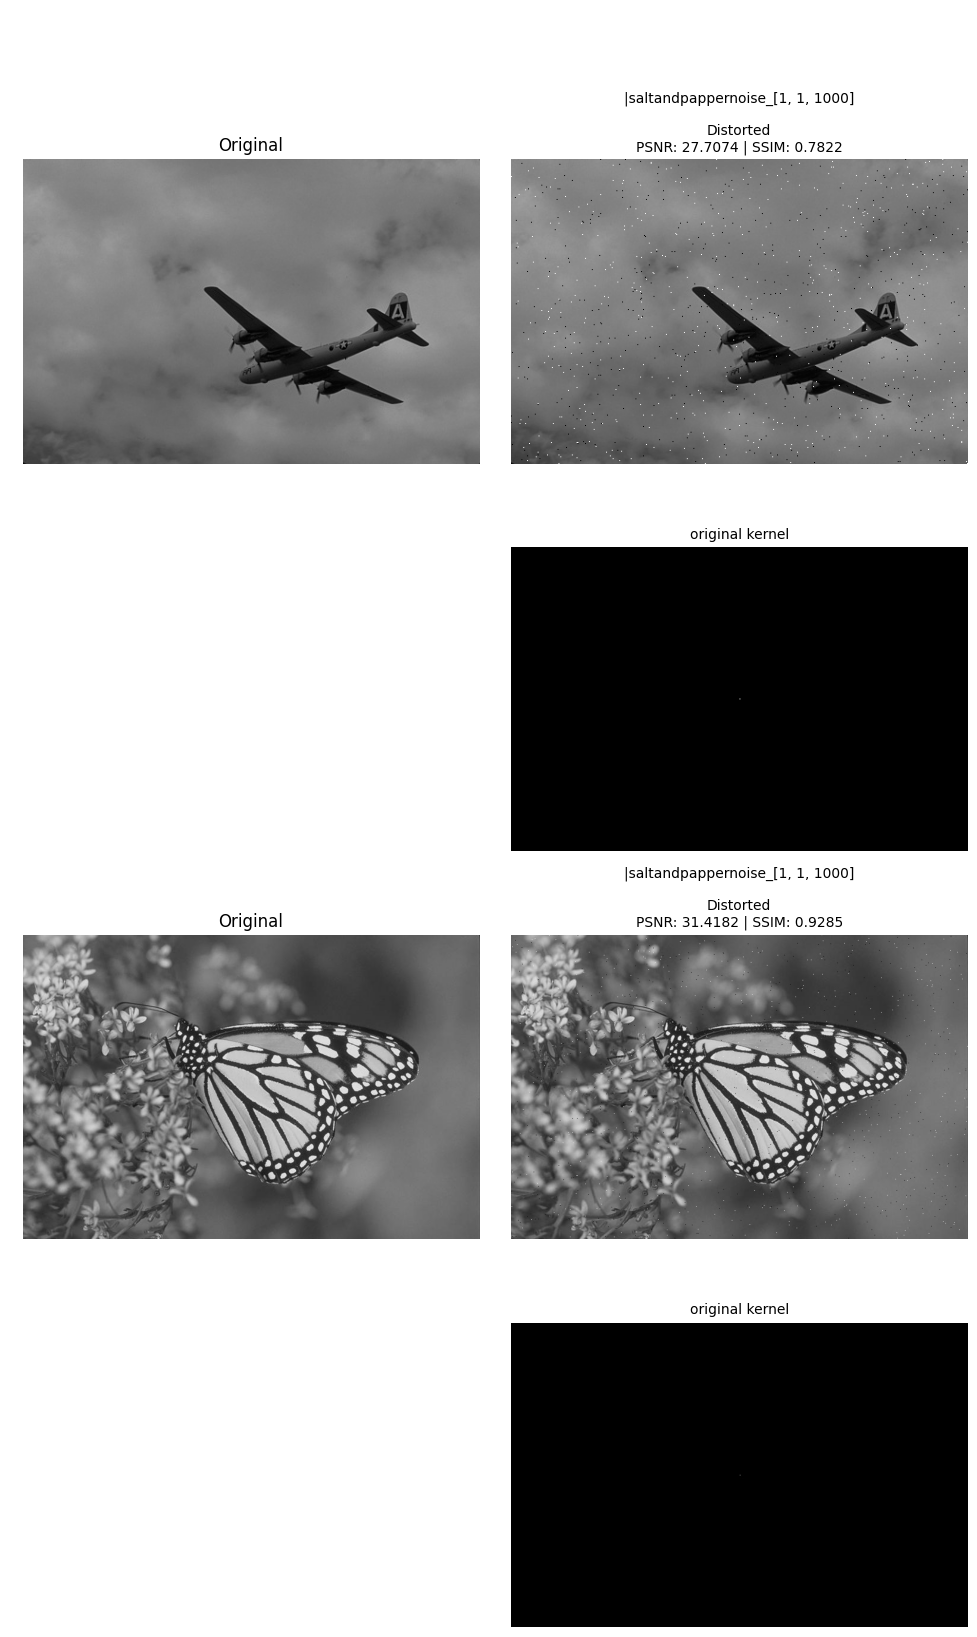

In [4]:
tmp.filter(fl4)
tmp.show()

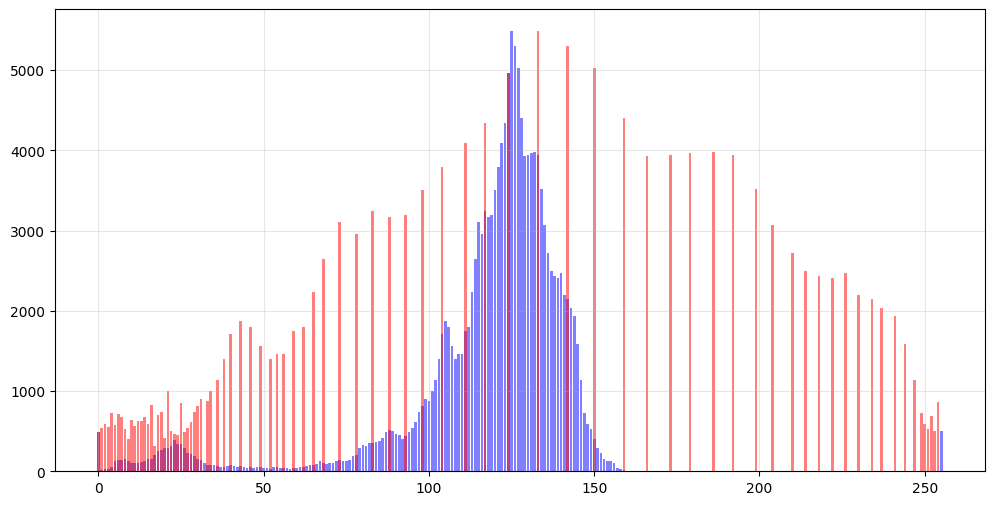

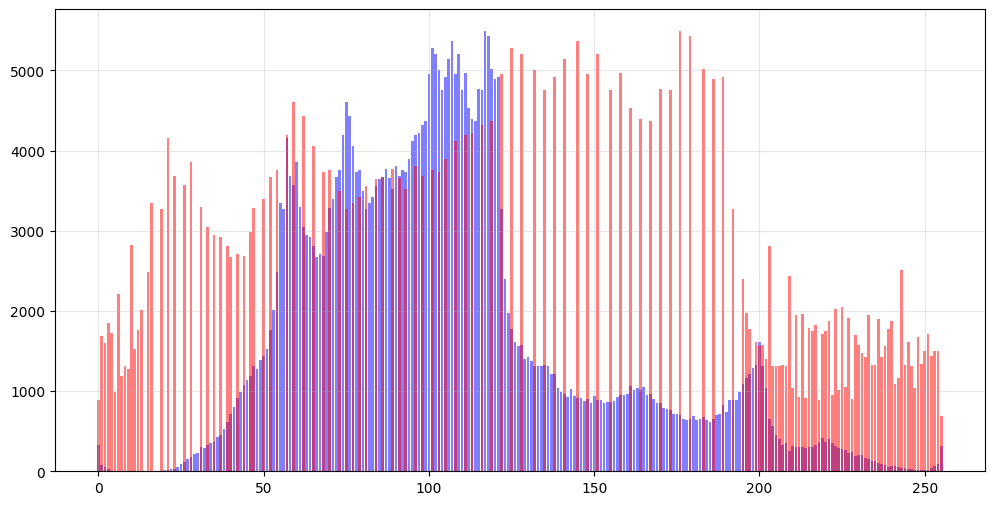

In [5]:
tmp.histogram_equalization(view_histogram=True)

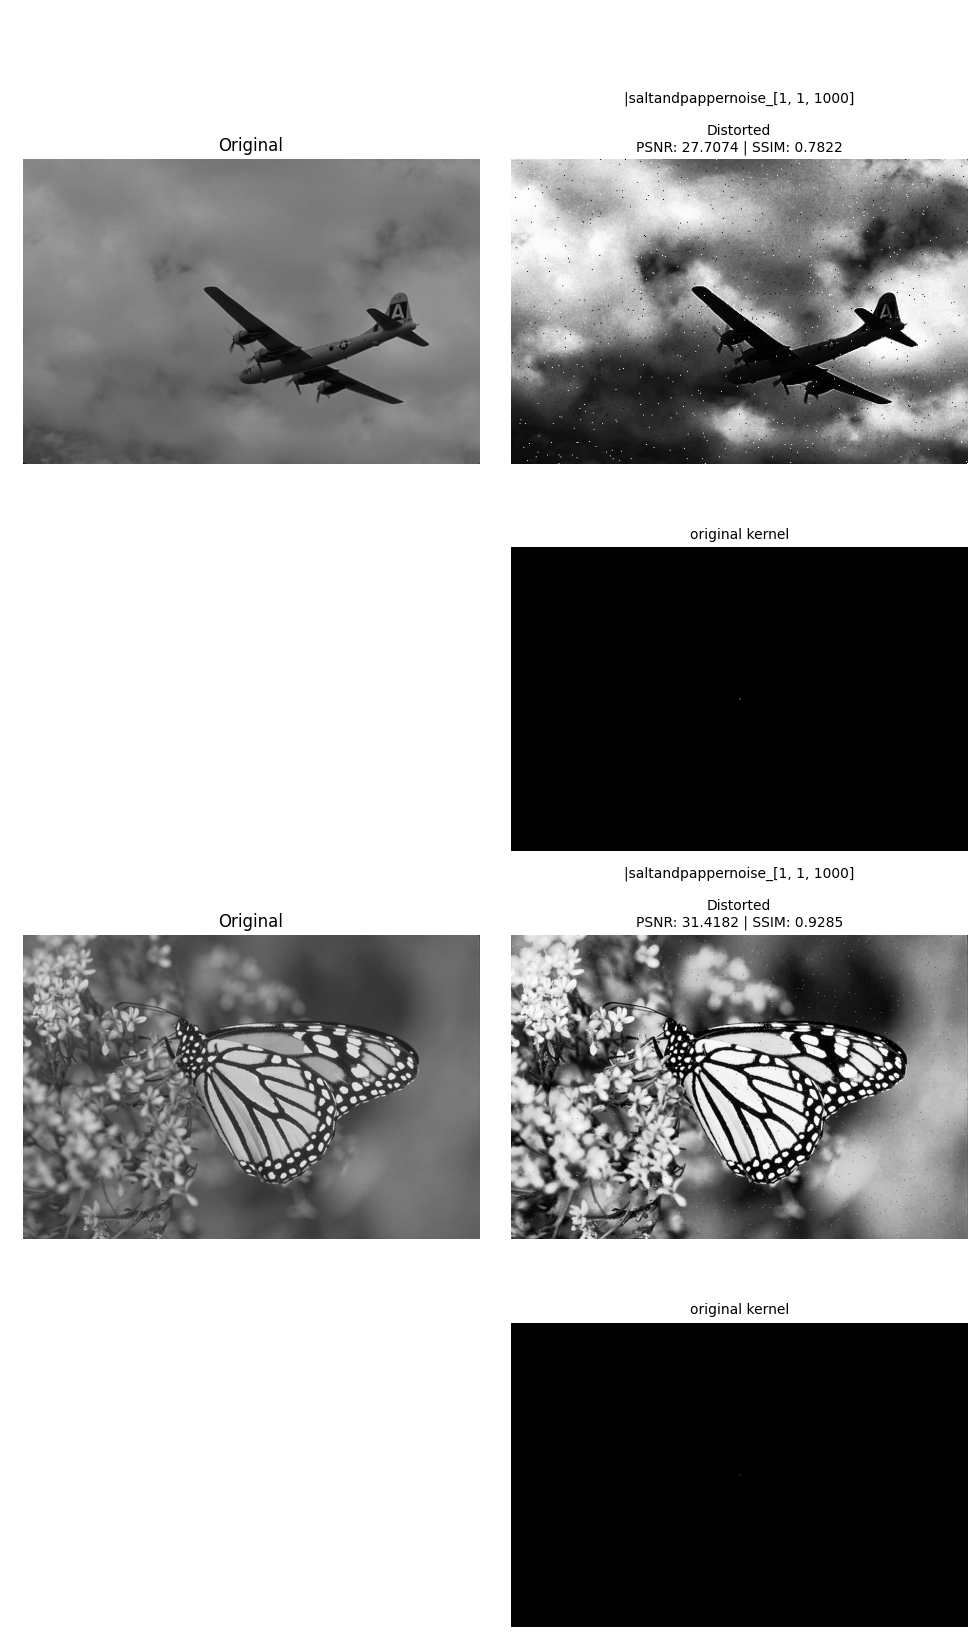

In [6]:
tmp.show()